# Prerequisites

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

In [2]:
fig_dir = "../figures"

# HW

# Confounder

# BugNIST 

## Classification

['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']


## Segmentation

In [9]:
model_dir = "../models/bn-seg-checkpoints"
stats_ind = pd.read_csv(f"{model_dir}/run-20240607-112444/stats.csv", index_col=0)
stats_synth = pd.read_csv(f"{model_dir}/run-synth/stats.csv", index_col=0)[-80:]
display(stats_ind.head())
display(stats_synth.head())

,train_loss,train_accuracy,val_loss,val_accuracy,epoch
0,1.725265,0.882147,1.094155,0.994977,NaN
1,1.061618,0.994913,1.032361,0.995335,NaN
2,1.024869,0.995254,1.006725,0.995293,NaN
3,1.002759,0.995484,0.988694,0.996279,NaN
4,0.985394,0.995759,0.985453,0.995481,NaN


,train_loss,train_accuracy,val_loss,val_accuracy,epoch
1,0.883988,0.997742,0.869561,0.999199,1.0
2,0.863111,0.998133,0.872499,0.999099,2.0
3,0.859125,0.998237,0.867333,0.999271,3.0
4,0.855293,0.998319,0.867745,0.999284,4.0
5,0.854305,0.998350,0.867106,0.999269,5.0


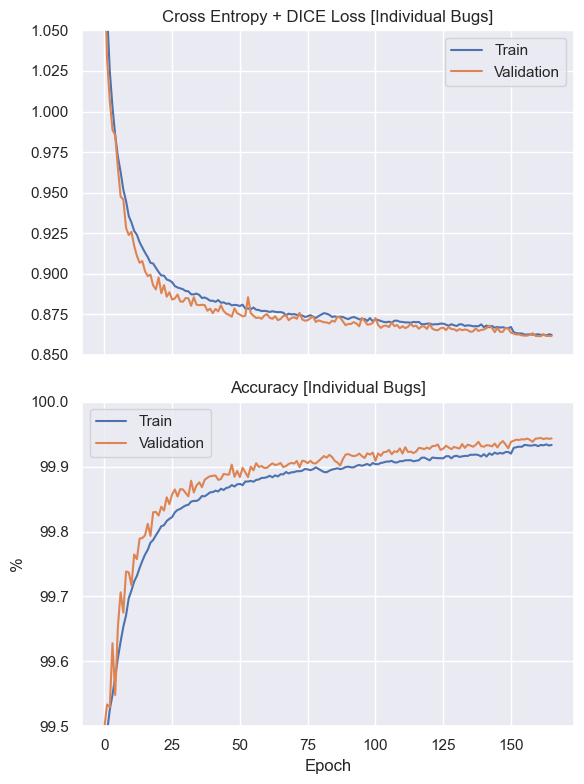

In [64]:
sns.set_theme()
cs = sns.color_palette().as_hex()
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(6, 8), tight_layout=True, sharex=True)
ax0.plot(stats_ind['train_loss'], c=cs[0], label='Train')
ax0.plot(stats_ind['val_loss'], c=cs[1], label='Validation')
ax0.set_ylim((0.85, 1.05))
ax0.set_title('Cross Entropy + DICE Loss [Individual Bugs]')
ax0.legend()
ax1.plot(stats_ind['train_accuracy'] * 100, label='Train')
ax1.plot(stats_ind['val_accuracy'] * 100, label='Validation')
# ax0.set_ylim((0.85, 1.05))
ax1.set_title('Accuracy [Individual Bugs]')
ax1.set_ylim((99.5, 100))
ax1.set_xlabel("Epoch")
ax1.set_ylabel("%")

ax1.legend()
# plt.savefig(f"{fig_dir}/segmentation_curves_individual.pdf", bbox_inches='tight')
plt.show();

# plt.xlim((0, len(stats_ind)))

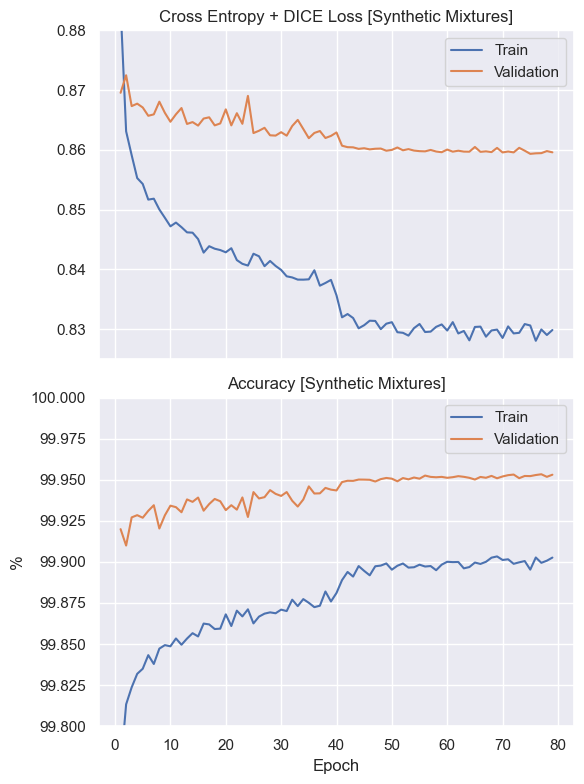

In [71]:
sns.set_theme()
cs = sns.color_palette().as_hex()
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(6, 8), tight_layout=True, sharex=True)
ax0.plot(stats_synth['train_loss'], c=cs[0], label='Train')
ax0.plot(stats_synth['val_loss'], c=cs[1], label='Validation')
ax0.set_ylim((0.825, 0.88))
ax0.set_title('Cross Entropy + DICE Loss [Synthetic Mixtures]')
ax0.legend()
ax1.plot(stats_synth['train_accuracy'] * 100, label='Train')
ax1.plot(stats_synth['val_accuracy'] * 100, label='Validation')
# ax0.set_ylim((0.85, 1.05))
ax1.set_title('Accuracy [Synthetic Mixtures]')
ax1.set_ylim((99.8, 100))
ax1.set_xlabel("Epoch")
ax1.set_ylabel("%")

ax1.legend()
# plt.savefig(f"{fig_dir}/segmentation_curves_synthmix.pdf", bbox_inches='tight')
plt.show();

# plt.xlim((0, len(stats_ind)))